In [1]:
import sys
print(sys.version)
import numpy as np
import ROOT
from array import *
import matplotlib.pyplot as plt
import time
import dunestyle.matplotlib as dunestyle

3.12.3 (main, Jan  8 2026, 11:30:50) [GCC 13.3.0]
DUNE plot style enabled


In [2]:
#path = '/media/leoperes/Acer/Users/le0_p/'
#path='~/Dropbox/BoostedDM/ntuples2023/'
path = '~/'

In [3]:
fAtm = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/atm_hA_BR_4ana.root')

fBDM_m10_b1p1 = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_m10_b1p1_00a.root')
fBDM_m10_b1p5 = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_m10_b1p5_00a.root')
fBDM_m10_b10 = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/bdm_m10_b10_00a.root')

fTree_atm = fAtm.Get("ana/Atm")
fTree_m10_b1p1 = fBDM_m10_b1p1.Get("ana/Atm")
fTree_m10_b1p5 = fBDM_m10_b1p5.Get("ana/Atm")
fTree_m10_b10 = fBDM_m10_b10.Get("ana/Atm")

nSimulatedEvtsReco_atm = fTree_atm.GetEntries()
nSimulatedEvtsReco_m10_b1p1 = fTree_m10_b1p1.GetEntries()
nSimulatedEvtsReco_m10_b1p5 = fTree_m10_b1p5.GetEntries()
nSimulatedEvtsReco_m10_b10 = fTree_m10_b10.GetEntries()

In [4]:

def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result


def GetBDTResponse(tree,xml_file):
    
    bdtOutput = []
    # in order to start TMVA
    ROOT.TMVA.Tools.Instance()
    reader = ROOT.TMVA.Reader("!Color:!Silent")
    
    event = array('f', [0])
    LongestTrack= array('f',[0])
    HighestTrackSummedADC= array('f',[0])
    PIDALongestTrack= array('f',[0])
    nTracks= array('f',[0])
    nShowers= array('f',[0])
    TotalMomentumP= array('f',[0])
    nSpacePoints= array('f',[0])
    NHits = array('f', [0])
    #NPrimaryDaughters= array('f',[0])
    HighestShowerSummedADC= array('f',[0])
    #PrimaryPDGReco= array('f',[0])
    LargeShowerOpenAngle= array('f',[0])
    LongestShower= array('f',[0])
    CosThetaDetTotalMom= array('f',[0])
    CosPhiDetTotalMom= array('f',[0])
    FracTotalChargeLongTrack= array('f',[0])
    AvarageTrackLength= array('f',[0])
    CVN_NCScore= array('f',[0])
    EventRecoEnergy_Charge = array('f',[0])
    EventRecoEnergy_numu = array('f',[0])
    EventRecoEnergy_nue = array('f',[0])
    #event = array('f',[0])
    
    #reader.AddSpectator("event", event)
    #reader.AddVariable("LongestTrack", LongestTrack)
    ##reader.AddVariable("log(HighestTrackSummedADC)", HighestTrackSummedADC)
    #reader.AddVariable("PIDALongestTrack", PIDALongestTrack)
    #reader.AddVariable("nTracks", nTracks)
    #reader.AddVariable("nShowers", nShowers)
    ##reader.AddVariable("TotalMomentumP", TotalMomentumP)
    #reader.AddVariable("NHits", NHits)
    ##reader.AddVariable("NPrimaryDaughters", NPrimaryDaughters)
    #reader.AddVariable("log(HighestShowerSummedADC)", HighestShowerSummedADC)
    ##reader.AddVariable("PrimaryPDGReco", PrimaryPDGReco)
    #reader.AddVariable("LargeShowerOpenAngle", LargeShowerOpenAngle)
    #reader.AddVariable("LongestShower", LongestShower)
    ##reader.AddVariable("CosThetaDetTotalMom", CosThetaDetTotalMom)
    ##reader.AddVariable("CosPhiDetTotalMom", CosPhiDetTotalMom)
    #reader.AddVariable("FracTotalChargeLongTrack", FracTotalChargeLongTrack)
    ##reader.AddVariable("AvarageTrackLength", AvarageTrackLength)
    #reader.AddVariable("CVN_NCScore", CVN_NCScore)
    ##reader.AddVariable("EventRecoEnergy_Charge", EventRecoEnergy_Charge)
    ##reader.AddVariable("EventRecoEnergy_numu", EventRecoEnergy_numu)
    ##reader.AddVariable("EventRecoEnergy_nue", EventRecoEnergy_nue)
    ##reader.AddSpectator("event", event)
    
   # reader.AddSpectator("event", event)
    reader.AddVariable("PIDALongestTrack", PIDALongestTrack) # PIDA of the longest track
    reader.AddVariable("nTracks", nTracks) # Number of tracks
    reader.AddVariable("nShowers", nShowers) # Number of showers
    reader.AddVariable("NHits", NHits) # Number of 3D space points
    reader.AddVariable("log(HighestShowerSummedADC)", HighestShowerSummedADC) # Highest Shower ADC
    reader.AddVariable("LargeShowerOpenAngle", LargeShowerOpenAngle) # Large shower opening angle
    reader.AddVariable("LongestShower", LongestShower) # Longest shower in event
    #reader.AddVariable("CVN_NCScore",CVN_NCScore) # CVN score for NC
    reader.AddVariable("LongestTrack", LongestTrack)
    reader.AddVariable("FracTotalChargeLongTrack", FracTotalChargeLongTrack)

    
    bdt_class_xml = xml_file 
    reader.BookMVA("TMVAClassification",bdt_class_xml)
    
    nentry = tree.GetEntries()
    
    for i in range(nentry):
        tree.GetEntry(i)
        #print(tree.NPrimaryDaughters)

        event[0] = float(tree.event)           
        LongestTrack[0] = float(tree.LongestTrack)
        #HighestTrackSummedADC[0] = float(tree.HighestTrackSummedADC)
        PIDALongestTrack[0] = float(tree.PIDALongestTrack)
        nTracks[0] = float(tree.nTracks)
        nShowers[0] = float(tree.nShowers)
        #TotalMomentumP[0] = float(tree.TotalMomentumP)
        NHits[0] = float(tree.NHits)
        #nSpacePoints[0] = float(tree.nSpacePoints)
        #NPrimaryDaughters[0] = float(tree.NPrimaryDaughters[0])
        HighestShowerSummedADC[0] = float(tree.HighestShowerSummedADC)
        #PrimaryPDGReco[0] = float(tree.PrimaryPDGReco[0])
        LargeShowerOpenAngle[0] = float(tree.LargeShowerOpenAngle)
        LongestShower[0] = float(tree.LongestShower)
        #CosThetaDetTotalMom[0] = float(tree.CosThetaDetTotalMom)
        #CosPhiDetTotalMom[0] = float(tree.CosPhiDetTotalMom)
        FracTotalChargeLongTrack[0] = float(tree.FracTotalChargeLongTrack)
        #AvarageTrackLength[0] = float(tree.AvarageTrackLength)
        #CVN_NCScore[0] = float(tree.CVN_NCScore)
        #EventRecoEnergy_Charge[0] = float(tree.EventRecoEnergy_Charge)
        #EventRecoEnergy_numu[0] = float(tree.EventRecoEnergy_numu)
        #EventRecoEnergy_nue[0] = float(tree.EventRecoEnergy_nue)
           
        bdt = reader.EvaluateMVA("TMVAClassification")
        bdtOutput.append(bdt)
            
    return np.array(bdtOutput)

In [8]:
#path = "/home/leoperes/Dropbox/BoostedDM/Final_Analysis/UpperLimitCode/BDT/dataset/weights/"
#BDTResponseAtm_grad = GetBDTResponse(fTree_atm, path+"TMVAClassification_BDTAtmCCNC_202503120817.weights.xml")
#BDTResponse_m10_b1p1_00a_grad = GetBDTResponse(fTree_m10_b1p1, path+"TMVAClassification_BDTAtmCCNC_202503121655.weights.xml")
#BDTResponseAtm_ada = GetBDTResponse(fTree_atm, path+"TMVAClassification_BDTAtmCCNC_202503120817.weights.xml")
#BDTResponse_m10_b1p1_00a_ada = GetBDTResponse(fTree_m10_b1p1, path+"TMVAClassification_BDTAtmCCNC_202503120817.weights.xml")

pathxml = "/home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/"
BDTResponseAtm_grad = GetBDTResponse(fTree_atm, pathxml+"TMVAClassification_BDTAtmCCNC_202601232232.weights.xml")
BDTResponse_m10_b1p1_00a_grad = GetBDTResponse(fTree_m10_b1p1, pathxml+"TMVAClassification_BDTAtmCCNC_202601232232.weights.xml")
BDTResponseAtm_ada = GetBDTResponse(fTree_atm, pathxml+"TMVAClassification_BDTAtmCCNC_202601232232.weights.xml")
BDTResponse_m10_b1p1_00a_ada = GetBDTResponse(fTree_m10_b1p1, pathxml+"TMVAClassification_BDTAtmCCNC_202601232232.weights.xml")

                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202601232232.weights.xml.
                         : Reading weight file: /home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202601232232.weights.xml
<HEADER> DataSetInfo              : [Default] : Added class "Signal"
<HEADER> DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDTAtmCCNC_202601232232" of type: "BDT"
                         : Rebuilding Dataset Default
                         : Booking "TMVAClassification" of type "BDT" from /home/leoperes/Desktop/UpperLimitCodeBDM_final/UpperLimitCodeBDM/BDT/dataset/weights/TMVAClassification_BDTAtmCCNC_202601232232.weights.xml.
                         : Reading weight file: /home/leoperes/Desktop/UpperLimitCodeBDM_final/Upp

In [17]:
CCNC_Atm = GetNpArraysFromTrees(fTree_atm,"CCNC")
CVN_Atm = GetNpArraysFromTrees(fTree_atm,"CVN_NCScore")
CVN_b1p1_bdm = GetNpArraysFromTrees(fTree_m10_b1p1,"CVN_NCScore")

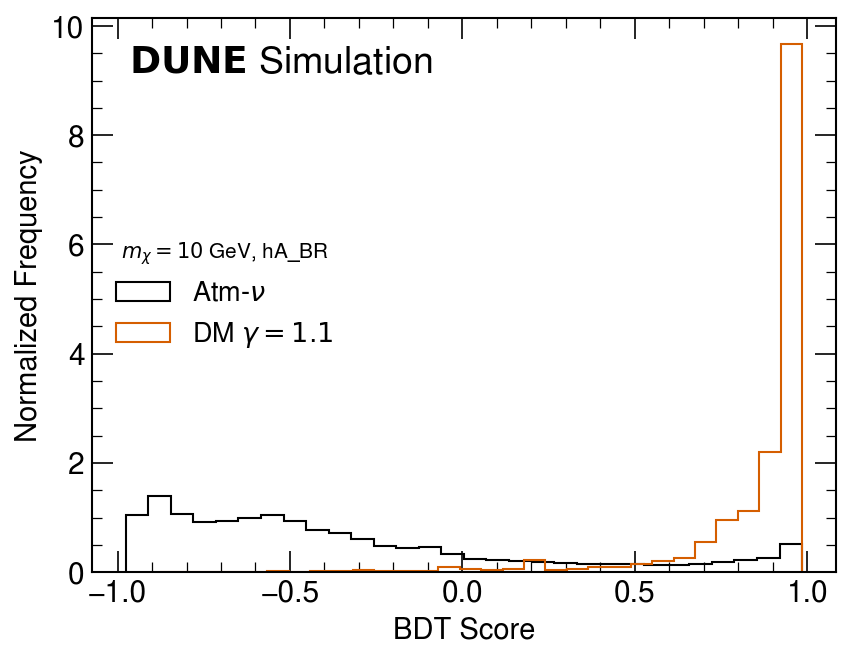

In [10]:
plt.figure(dpi=150)
h1, x1, _ = plt.hist(BDTResponseAtm_grad, bins= 30,density=True, label=r'Atm-$\nu$', histtype='step', lw =1)
#h5, x5, _ = plt.hist(BDTResponseAtm_ada, bins= 30, density=True, label=r'Atm-$\nu$ NC', histtype='step', lw =1)
h2, x2, _ = plt.hist(BDTResponse_m10_b1p1_00a_grad, bins= 30,density=True, label=r'DM $\gamma = 1.1 $', histtype='step',lw =1)
#h3, x3, _ = plt.hist(BDTResponse_m10_b1p1_00a_ada, bins= 30, density=True, label=r'DM $\gamma = 1.5 $', histtype='step',lw =1)
#h4, x4, _ = plt.hist(BDTResponse_m10_b10_00a, bins= 30, density=True, label=r'DM $\gamma = 10 $', histtype='step',lw =1)
plt.xlabel('BDT Score',fontsize=14)
plt.ylabel('Normalized Frequency', fontsize=14)
plt.legend(title = r'$m_\chi=10$ GeV, hA_BR',ncols=1, fontsize=13)
dunestyle.Simulation()
#plt.savefig('bdt_all_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()